### FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/ML_DS_Resources/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape
print('The data set has', df.shape[0], 'rows and', df.shape[1], 'columns')

The data set has 1898 rows and 9 columns


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame

print('The datatypes are', df.dtypes)

The datatypes are order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations: The different data types are int, object, and floats


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()
print('There are no missing values')

There are no missing values


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
description = df.describe()
min_delivery_time = description.at['min', 'delivery_time']
ave_delivery_time = description.at['mean', 'delivery_time']
max_delivery_time = description.at['max', 'delivery_time']
print('The min is', min_delivery_time, ', the average is', round(ave_delivery_time, 2), ', the max is', max_delivery_time, '.')

The min is 15.0 , the average is 24.16 , the max is 33.0 .


#### Observations:


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating']
not_rated = (df['rating'] == "Not given").sum()
print(f"There are {not_rated} orders that are not rated")


There are 736 orders that are not rated


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

All Univariate Data Analysis are at the bottom of Question 6. :)

,cuisine_type
count,1898
unique,14
top,American
freq,584


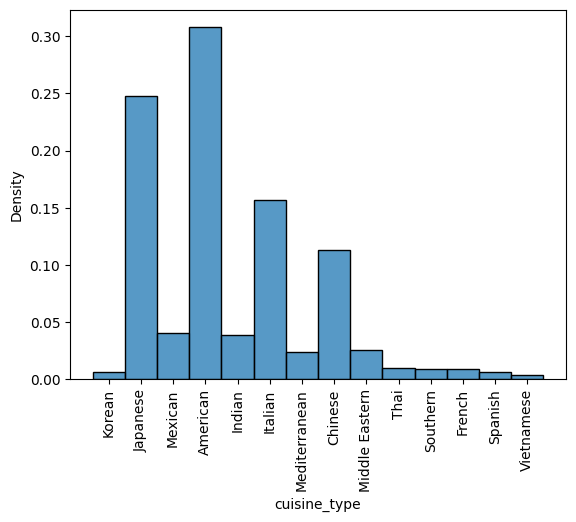

In [ ]:
# Write the code here
sns.histplot(df['cuisine_type'], stat = 'density')
plt.xticks(rotation = 90)
df['cuisine_type'].describe()

<Axes: xlabel='day_of_the_week', ylabel='Density'>

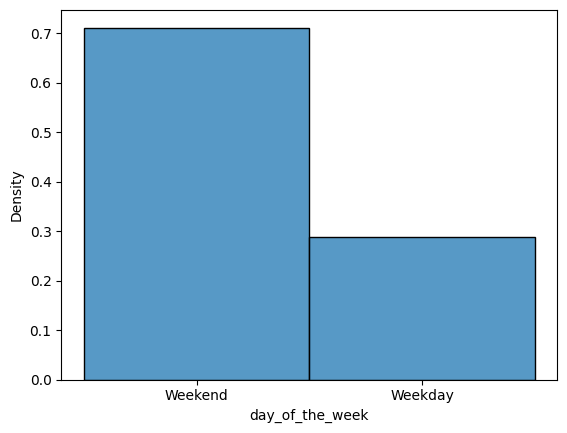

In [ ]:
sns.histplot(df['day_of_the_week'], stat = 'density')

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


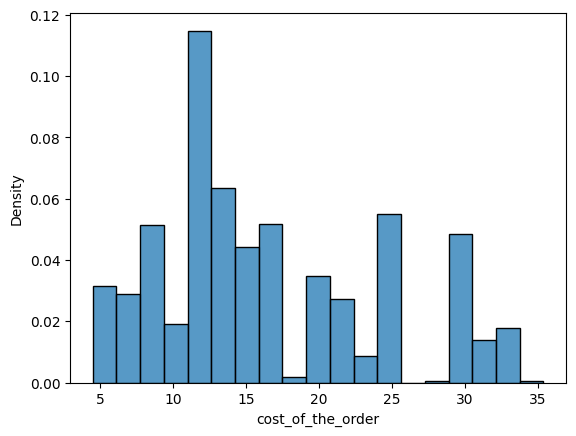

In [ ]:
sns.histplot(df['cost_of_the_order'], stat = 'density')
df['cost_of_the_order'].describe()

,rating
count,1898
unique,4
top,Not given
freq,736


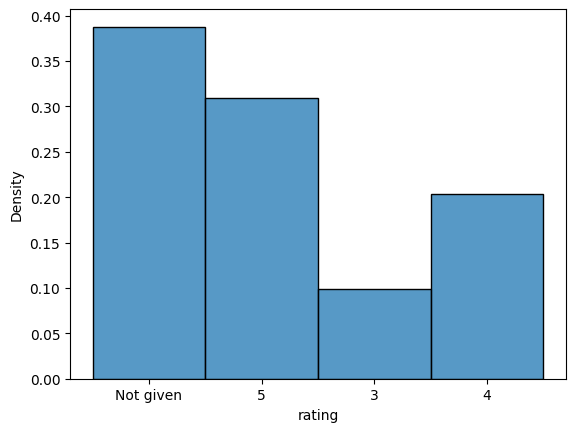

In [ ]:
sns.histplot(df['rating'], stat = 'density')
df['rating'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


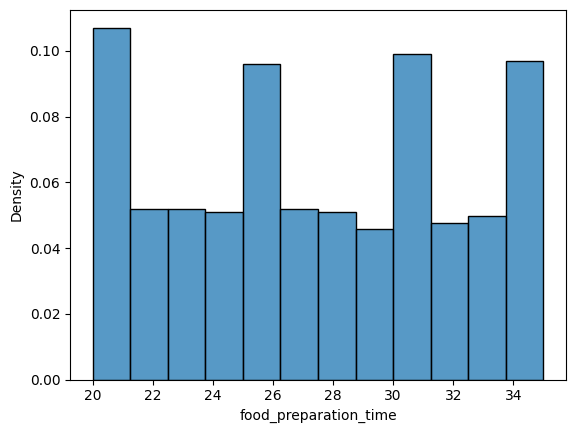

In [ ]:
sns.histplot(df['food_preparation_time'], stat = 'density')
df['food_preparation_time'].describe()

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


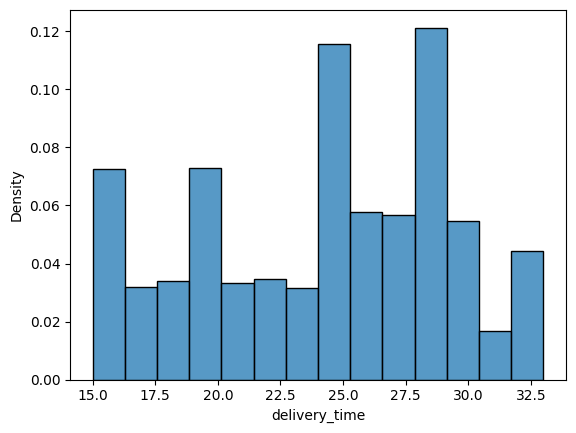

In [ ]:
sns.histplot(df['delivery_time'], stat = 'density')
df['delivery_time'].describe()

####Oberservations:
**Cuisines Type:** There are 14 different types of cuisines. There are much more American and Japanese cuisines, the most being American. They make up more than half of all restaurants. The least amount is Vietnamese cuisines.

**Day of the week:** Around 70% of all orders are ordered on weekends while around 30% percent of orders are on the weekdays. There are far more weekend orders, more than double

**Cost of the orders:** Most of the orders cost between 10 and 15 dollars, the average being around 16 dollars and standard deviation around $7.50.

**Order ratings:** Most orders were not given a rating. There were no ratings that were 1 or 2. 30% of orders were given a 5, 20% was given a 4, and around 10% was given a 3

**Food Prep Time:** The average prep time is 27 minutes with a STD of 4.6 minutes. The fastest was 20 minutes and slowest was 35 minutes

**Delivery Time:** The average delivery time is around 24 minutes with a STD of around 5 minutes. The fastest delivery time is 15 minutes and the slowest being 33.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().head(5)


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:The top 5 restaurants in terms of number of orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm



### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
weekend = df[df['day_of_the_week'] == 'Weekend']
weekend['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations:The most popular cuisine on the weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
over_twenty = (df['cost_of_the_order'] > 20).sum()
print(over_twenty/len(df))

0.2924130663856691


#### Observations: Around 29.2% of orders are over $20


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
print(df['delivery_time'].mean())

24.161749209694417


#### Observations: The mean delivery time is around 24.2 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
print(df['customer_id'].value_counts().head(3))

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The top 3 customers are 52832 with 13 orders, 47440 with 10 orders, and 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

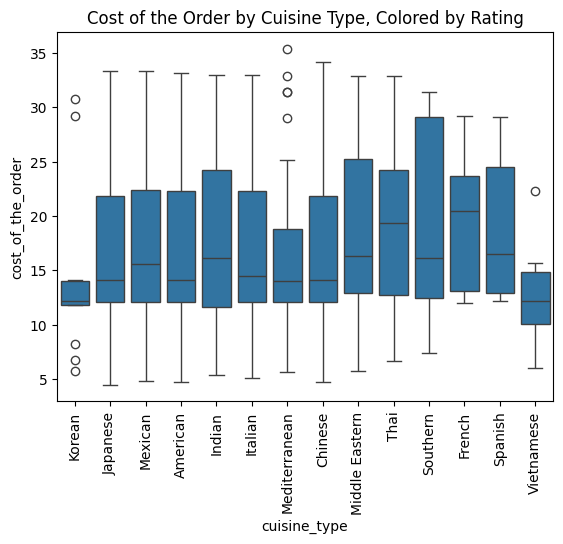

In [ ]:
# Write the code here
sns.boxplot(data = df, x='cuisine_type', y='cost_of_the_order')
plt.title('Cost of the Order by Cuisine Type, Colored by Rating')
plt.xticks(rotation=90)

****Observations**** This box plot shows the relationship between each cuisine type and their prices. French cuisine had the highest median, which means people that ordered French food paid more than other cuisines. Chinese cuisine has the largest range, which means their prices range higher than any other cuisine. Korean has the smallest, which means most of their orders are close in price.

<Axes: xlabel='day_of_the_week', ylabel='food_preparation_time'>

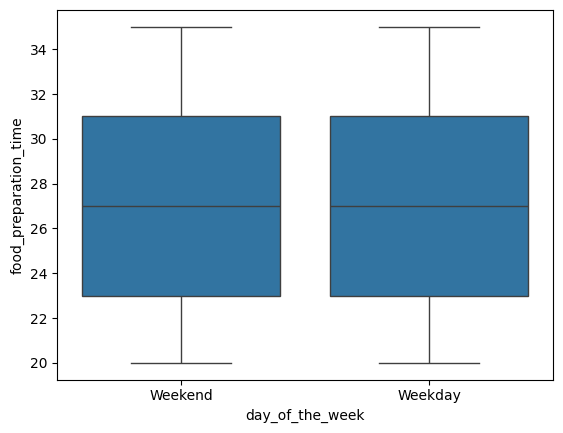

In [ ]:
sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time')

****Observations**** The box plots for prep times on weekends and weekdays are the same. This means that the day of the week does not effect the time it takes to prepare the food.

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

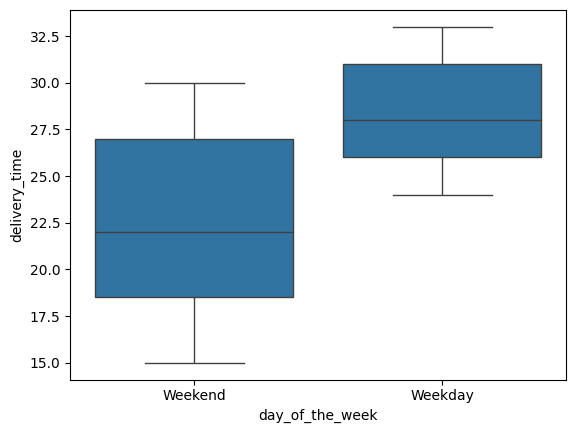

In [ ]:
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time')

****Oberservations**** The median delivery time on weekdays is much higher than weekends. This means it takes much longer for the food to be delivered on weekdays, probably because there is much more traffic.

<Axes: xlabel='rating', ylabel='food_preparation_time'>

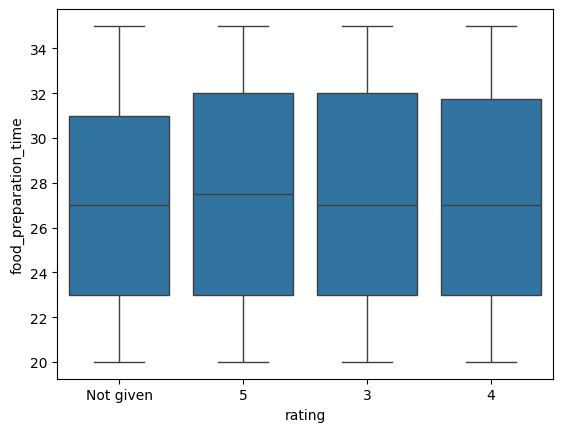

In [ ]:
sns.boxplot(data = df, y = 'food_preparation_time', x = 'rating')

****Oberservations**** This boxplot compares the ratings to the food prep time. All box plots are very similar, which shows that prep times do not affect the ratings much.

<Axes: xlabel='rating', ylabel='delivery_time'>

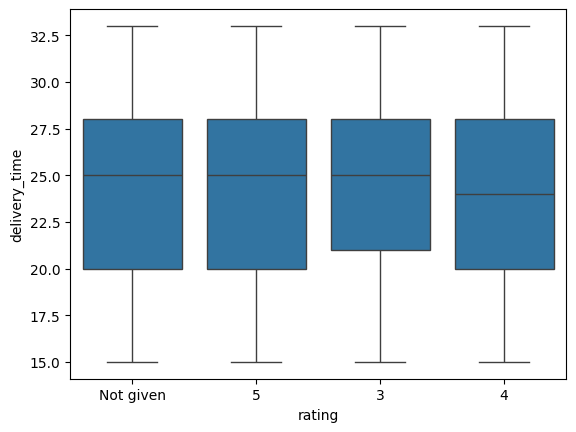

In [ ]:
sns.boxplot(data = df, y = 'delivery_time', x = 'rating')

****Oberservations**** Just like the preparation times, delivery times do not have much effect on ratings. The medians are about the same.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
#Made a copy of the data frame that does not include 'Not given' ratings
valid_ratings = df[df['rating'] != 'Not given'].copy()

#Casted the ratings from string to an int
valid_ratings['rating'] = pd.to_numeric(valid_ratings['rating'])

#Filter the restaurants that have greater than 50 ratings
number_ratings = valid_ratings['restaurant_name'].value_counts()
over_fifty = number_ratings[number_ratings > 50]

#initialize the total ratings of restaurants with over 50 ratings
shake_shack_rating = 0
meatball_ratings = 0
sushi_ratings = 0
friedchicken_ratings = 0

#loops through my valid_ratings data frame
#add up the total ratings
for i in range(len(valid_ratings)):
  if valid_ratings['restaurant_name'].iloc[i] == 'Shake Shack':
    shake_shack_rating += valid_ratings['rating'].iloc[i]
  elif valid_ratings['restaurant_name'].iloc[i] == 'The Meatball Shop':
    meatball_ratings += valid_ratings['rating'].iloc[i]
  elif valid_ratings['restaurant_name'].iloc[i] == 'Blue Ribbon Sushi':
    sushi_ratings += valid_ratings['rating'].iloc[i]
  elif valid_ratings['restaurant_name'].iloc[i] == 'Blue Ribbon Fried Chicken':
    friedchicken_ratings += valid_ratings['rating'].iloc[i]

#divided the sum of ratings by the number of ratings to get the average
print(shake_shack_rating/ over_fifty['Shake Shack'])
print(meatball_ratings/ over_fifty['The Meatball Shop'])
print(sushi_ratings/ over_fifty['Blue Ribbon Sushi'])
print(friedchicken_ratings/ over_fifty['Blue Ribbon Fried Chicken'])
over_fifty.head()


4.2781954887218046
4.511904761904762
4.219178082191781
4.328125


,count
restaurant_name,
Shake Shack,133
The Meatball Shop,84
Blue Ribbon Sushi,73
Blue Ribbon Fried Chicken,64


#### Observations: The restaurants that have over 50 reviews and over an average of 4 star rating are Shake Shack with 133 reviews and 4.28 rating, The Meatball Shop with 84 reviews and 4.51 rating, Blue Ribbon Sushi with 73 reviews and 4.22 ratinge, and Blue Ribbon Fried Chicken with 64 reviews and 4.33 rating.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here

#create a data frame that only contains costs of all orders
costs = df['cost_of_the_order']

#filter to orders that cost more than $20
over_twenty = costs[costs > 20]

#add all the order prices
total_cost_over_twenty = over_twenty.sum()

#did the same for orders over $5 and less than $20
over_five = costs[(costs > 5) & (costs < 20)]

total_cost_over_five = over_five.sum()

#find the total revenue
print(total_cost_over_twenty * .25 + total_cost_over_five * .15)

6166.303


#### Observations: The net revenue generated by the company across all orders is 6166.30 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here

#cast the times to an int
df['delivery_time'] = pd.to_numeric(df['delivery_time'])
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'])

#add the delivery time and food prep time
total_time = df['delivery_time'] + df['food_preparation_time']

#filter the times less than 60 minutes
total_time = total_time[total_time > 60]

#find the percentage of orders that take over 60 minutes
print(len(total_time)/len(df))

0.1053740779768177


#### Observations: Around 10.54% of orders will take over 60 minutes to be delivered from when the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here

#filter and categorize weekday and weekend orders
weekdays = df[df['day_of_the_week'] == 'Weekday']
weekends = df[df['day_of_the_week'] == 'Weekend']

#find the average times of weekday and weekend
print(weekdays['delivery_time'].mean())
print(weekends['delivery_time'].mean())


28.340036563071298
22.4700222057735


In [ ]:
print(df[df['day_of_the_week'] == 'Weekend'].copy())

      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
3      1477334       106968              Blue Ribbon Fried Chicken   
6      1477894       157711                      The Meatball Shop   
11     1478437       221206                 Empanada Mama (closed)   
...        ...          ...                                    ...   
1891   1476981       138586                            Shake Shack   
1892   1477473        97838                            Han Dynasty   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1897   1478056       120353                      Blue Ribbon Sushi   

     cuisine_type  cost_of_the_order day_of_the_week     rating  \
0          Korean              30.75         Weekend  Not given   
1        Japanese        

#### Observations: The mean delivery time on weekdays was around 28 minutes while weekend was 24. the time for weekdays was around 5 minutes higher than weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken have over 50 reviews and an average rating above 4. These establishments are popular and well liked.
*  The company made around $6,100 dollars of revenue from the orders.
*  The average delivery time is 24 minutes.
*  American cuisine seems to be the most popular cuisine accoring to customers.
*  There was no correlation between the delivery or preparation time to ratings, which might suggest that customers don't rate based on time.
*  The company brings in significant revenue for orders at a higher cost of 20 dollars

### Recommendations:

*  We can optimize staff scheduling on weekends to make delivery times more consistent with the mean deliveryt time.
*  We should promote the highly rated restaurants such as Shake Shack to make it more popular.
*  For lower rated restaurants, we can work with them to help satisfy the customer more, such as faster prep and delivery time.
*  For more popular cuisines, we can partner with more restaurants to fall under that cuisine category and build a larger customer base.
*  During off-peak hours, we can offer promotions that boost the number of orders.
*  We should use insights from ratings to create targeted campaigns.
*  We should prioritize higher cost orders to ensure they are delivered promptly. This can be an added feature that customers can choose.
*  Create incentives for rating. There were many ratings that were not given. Ratings are important for our company and the restaurant to improve. We can offer a 5 dollar discount for every 5 ratings.
*  We can use predictive analytics to predict which cuisine, restaurant, time, or area will be flooded with orders. We can then allocate more delivery drivers to that area.
* Create a communication system between the customer, restaurant, and delivery driver. This way, if there is a delay, the customer will be notified and won't wonder what happened with the food.

---